## Dataset for very deep learning
Data [here:](https://gitlab.com/sarmaps/sar-ship-dataset)

Article [here:](https://sci-hub.ren/10.1109/igarss.2016.7729017)

In [1]:
import os

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from collections import Counter
from os.path import join
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [2]:
# Define path to the data
PATH = r'C:\Users\arman\Documents\GitHub\sar_ship_detect'
#data_path = join(os. getcwd(), '..','data', 'Iceberg-classifier-challenge')
data_path = join(PATH, 'data', 'very_deep_learn_data', 'json')

In [3]:
os.listdir(data_path)

['false_positives.json', 'ship_positives.json', 'true_negatives.json']

### DATA DESCRIPTION
A SAR dataset has been created using 22 Sentinel-1 (Extra
Wide Swath) and 3 RADARSAT-2 (Scan-SAR Narrow) acquisition with a total of 42 dual and 4 single polarized, radiometrically calibrated images. The dataset covers approximately 80% of the South African Exclusive Economic Zone (EEZ) with multiple acquisitions over a number of harbours (high ship densities). For this experiment, the dataset was analysed and split into three classes of `21 × 21` sub-images, containing **ships** (`positives`), **ship-like areas** (`false positives`) and **ocean areas** (`negatives`). The usefulness of splitting the samples up into three classes is that it now allows for a more descriptive analysis of how various methods deal with `ship lookalikes` and open ocean areas. The `1596 positive examples` were identified using expert analysis with each ship having an associated ground truth image not used in this experiment. The false positive sub-images were generated by selecting areas that did not contain ships but were incorrectly highlighted by a `low-threshold cell-averaging constant false alarm rate` (CA-CFAR). This lowthreshold approach was done to generate as many samples as possible for future experiments. Of the approximate 500 000 false positive sub-images extracted across the 46 images, `3192 false positive` images were selected at random. This is twice as many as the positive examples and represents the distribution of false positives to positives that would be encountered with careful prescreening threshold design and selection. Finally, `1596 sub-images that did not contain either a ship or false positive` were selected as negative ocean samples. Depending on the selected prescreening method, the negative samples will often not be presented to the ship discrimination classifier. They are provided here, however, to train the classifier to handle negative samples. No additional feature extraction was performed on the 9588 sub-images resulting in input feature set of 21x21 normalized RCS pixel values per image․

In [4]:
#Load the data.
false_positives = pd.read_json(join(data_path, 'false_positives.json'))
ship_positives = pd.read_json(join(data_path, 'ship_positives.json'))
true_negatives = pd.read_json(join(data_path, 'true_negatives.json'))

In [5]:
print('true_positives: ',ship_positives.shape)
print('false_positives:',false_positives.shape) # not corresponding to the data sescribtion, should be checked out
print('true_negatives: ',true_negatives.shape)

true_positives:  (1, 1596)
false_positives: (1, 6384)
true_negatives:  (1, 1596)


In [6]:
false_positives[0][0].keys()

dict_keys(['sensor', 'fullname', 'polarisation', 'incidenceangle', 'row', 'column', 'longitude', 'latitude', 'gttype', 'thresh', 'R', 'patchfu', 'windowfu'])

In [36]:
im = np.array(false_positives[0][0]['windowfu'])#.shape
im.shape

(21, 21)

In [37]:
false_positives[1300][0]['thresh']

1

In [9]:
ship_positives[0][0].keys()

dict_keys(['id', 'sensor', 'resolution', 'fullname', 'polarisation', 'incidenceangle', 'row', 'column', 'longitude', 'latitude', 'stats', 'R', 'nearest', 'pixelsize', 'patchfu', 'patchgt', 'windowfu', 'windowgt', 'validais', 'ais', 'aux'])

In [29]:
#n.array(ship_positives[0][0]['windowgt']).shape
#ship_positives[0][0]['validais']
np.array(ship_positives[120][0]['patchfu']).shape

(101, 101)

In [32]:
ship_positives[122][0]['ais']

{'imo': 9606429,
 'mmsi': 477766900,
 'dbcommsid': 477766900,
 'name': 'PACIFIC COURAGE',
 'callsign': 'VRJU5',
 'flag': 'Hong Kong HK',
 'bearing': -104.5019441,
 'length': 295,
 'breadth': 46.06,
 'type': '70-Cargo Vessels',
 'sog': 6.070444,
 'grosstonnage': 94866,
 'deadweight': 180008,
 'year': 2013,
 'aismindist': 46.58884508,
 'trackmindist': 0.3286270873}

In [12]:
true_negatives[0][0].keys()

dict_keys(['sensor', 'fullname', 'polarisation', 'incidenceangle', 'row', 'column', 'longitude', 'latitude', 'gttype', 'thresh', 'R', 'patchfu', 'windowfu'])

In [13]:
np.array(true_negatives[0][0]['windowfu']).shape

(21, 21)

In [14]:
def data_extractor(d_frame, dict_key):
    """Extract data from json file and 
    transform it as ndarray"""
    #dict_key: should be text
    
    list_of_arrays = []
    for i in range(d_frame.shape[1]):
        single_arr = d_frame[i][0][dict_key]
        list_of_arrays.append(single_arr)

    return np.array(list_of_arrays)

# To DO
## Recover the incidence angle as a band

In [109]:
# get true positive data
ship_positive_data = data_extractor(ship_positives, 'windowfu')
#ship_positive_target = data_extractor(ship_positives, 'validais')
# define ship target cass as "2"
ship_positive_target = np.full(ship_positives.shape[1], 2)


In [57]:
# get true positive data
false_positives_data = data_extractor(false_positives, 'windowfu')
false_positives_target = data_extractor(false_positives, 'thresh')

In [60]:
# get true positive data
true_negatives_data = data_extractor(true_negatives, 'windowfu')
true_negatives_target = data_extractor(true_negatives, 'thresh')

In [111]:
data = np.concatenate([ship_positive_data[:, :, :, np.newaxis], false_positives_data[:, :, :, np.newaxis],
                          true_negatives_data[:, :, :, np.newaxis]], axis=-1)

target=train['is_iceberg']

(1596,)

In [112]:
print(dict(Counter(ship_positive_target)))
print(dict(Counter(false_positives_target)))
print(dict(Counter(true_negatives_target)))

{2: 1596}
{1: 6384}
{0: 1596}


Text(0.5, 1.0, 'random noise')

<Figure size 432x288 with 0 Axes>

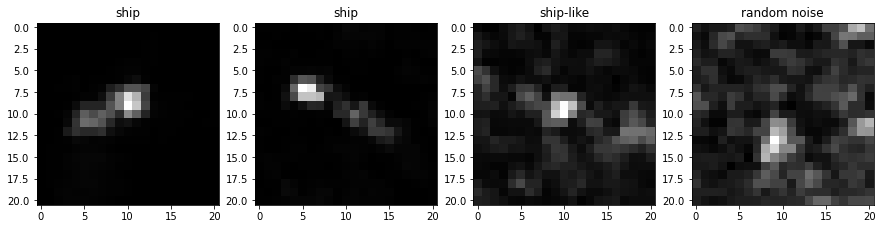

In [106]:
# visualize image samples

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4, figsize=(15, 15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(ship_positive_data[1200,:,:], cmap="gray")
axarr[0].set_title('ship')
axarr[1].imshow(ship_positive_data[14,:,:], cmap="gray")  
axarr[1].set_title('ship')
axarr[2].imshow(false_positives_data[123,:,:], cmap="gray")
axarr[2].set_title('ship-like')
axarr[3].imshow(true_negatives_data[123,:,:], cmap="gray") 
axarr[3].set_title('random noise')